In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import gymnasium as gym
from IPython import display
import pandas as pd
from gymnasium import spaces
import torch as th
import torch.nn.functional as F
import seaborn as sns
from sklearn.metrics import confusion_matrix



## Pre Process


In [ ]:
def add_gaussian_noise(data, mean=0, std_dev=4):
    noise = np.random.normal(mean, std_dev, data.shape)
    noisy_data = data + noise
    return noisy_data

In [ ]:
def downsample(data):
  return data[:, ::10, :]

In [ ]:
# Path to the folder containing Normal condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\Normal'

# List to store all Normal CSV data
normal_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'Normal_{i}.csv')
    df = pd.read_csv(file_path)
    normal_data.append(df.values)  # Convert DataFrame to NumPy array

# Path to the folder containing AddWeight condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\AddWeight'

# List to store all AddWeight CSV data
add_weight_dta = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'AddWeight_{i}.csv')
    df = pd.read_csv(file_path)
    add_weight_dta.append(df.values)

# Path to the folder containing PropellerDamage_slight CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_slight'

# List to store all PropellerDamage_slight data
PropellerDamage_slight_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PropellerDamage_slight_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_slight_data.append(df.values)

# Path to the folder containing PropellerDamage_bad CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_bad'

# List to store all PropellerDamage_bad data
PropellerDamage_bad_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PropellerDamage_bad_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_bad_data.append(df.values)

# Path to the folder containing PressureGain_constant CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PressureGain_constant'

# List to store all PressureGain_constant data
PressureGain_constant_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PressureGain_constant_{i}.csv')
    df = pd.read_csv(file_path)
    PressureGain_constant_data.append(df.values)

# Concatenate all CSV file data into one large NumPy array per class
normal = np.concatenate(normal_data, axis=0)
add_weight = np.concatenate(add_weight_dta, axis=0)
PropellerDamage_slight = np.concatenate(PropellerDamage_slight_data, axis=0)
PropellerDamage_bad = np.concatenate(PropellerDamage_bad_data, axis=0)
PressureGain_constant = np.concatenate(PressureGain_constant_data, axis=0)


In [ ]:
# Path to the folder containing Normal condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\Normal'

# List to store all Normal CSV data
normal_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'Normal_{i}.csv')
    df = pd.read_csv(file_path)
    normal_data.append(df.values)

# Path to the folder containing AddWeight condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\AddWeight'

# List to store all AddWeight CSV data
add_weight_dta = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'AddWeight_{i}.csv')
    df = pd.read_csv(file_path)
    add_weight_dta.append(df.values)

# Path to the folder containing PropellerDamage_slight CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_slight'

# List to store all PropellerDamage_slight data
PropellerDamage_slight_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'PropellerDamage_slight_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_slight_data.append(df.values)

# Path to the folder containing PropellerDamage_bad CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_bad'

# List to store all PropellerDamage_bad data
PropellerDamage_bad_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'PropellerDamage_bad_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_bad_data.append(df.values)

# Path to the folder containing PressureGain_constant CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PressureGain_constant'

# List to store all PressureGain_constant data
PressureGain_constant_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'PressureGain_constant_{i}.csv')
    df = pd.read_csv(file_path)
    PressureGain_constant_data.append(df.values)

# Concatenate all CSV file data into one large NumPy array per class
normal_test = np.concatenate(normal_data, axis=0)
add_weight_test = np.concatenate(add_weight_dta, axis=0)
PropellerDamage_slight_test = np.concatenate(PropellerDamage_slight_data, axis=0)
PropellerDamage_bad_test = np.concatenate(PropellerDamage_bad_data, axis=0)
PressureGain_constant_test = np.concatenate(PressureGain_constant_data, axis=0)


In [ ]:
def apply_2d_fft(data):
    # Apply 2D FFT to each sample's feature matrix
    fft_result = np.fft.fft2(data)
    magnitude_spectrum = np.abs(fft_result)
    return magnitude_spectrum

In [ ]:
from sklearn.preprocessing import StandardScaler

# Merge  data from all classes into a single dataset
data = np.concatenate((normal, add_weight, PropellerDamage_slight, PropellerDamage_bad, PressureGain_constant))

# Create corresponding labels for each class
labels_normal = np.zeros(normal.shape[0])
labels_add = np.ones(add_weight.shape[0])
labels_slight = np.full(PropellerDamage_slight.shape[0], 2)
labels_bad = np.full(PropellerDamage_bad.shape[0], 3)
labels_pressure = np.full(PressureGain_constant.shape[0], 4)

# Concatenate all label arrays into a single label vector
labels = np.concatenate([
    labels_normal,
    labels_add,
    labels_slight,
    labels_bad,
    labels_pressure
])

# Print the shapes of the final dataset and label array
print("shape of fft_data:", data.shape)
print("shape of labels:", labels.shape)
testx = np.concatenate((normal_test, add_weight_test, PropellerDamage_slight_test, PropellerDamage_bad_test, PressureGain_constant_test))
labels_normal = np.zeros(normal_test.shape[0])
labels_add = np.ones(add_weight_test.shape[0])
labels_slight = np.full(PropellerDamage_slight_test.shape[0], 2)
labels_bad = np.full(PropellerDamage_bad_test.shape[0], 3)
labels_pressure = np.full(PressureGain_constant_test.shape[0], 4)
ylabels = np.concatenate([
    labels_normal,
    labels_add,
    labels_slight,
    labels_bad,
    labels_pressure
])
X_train = data
y_train = labels

# Apply Gaussian noise to training and validation sets
X_train = add_gaussian_noise(X_train)

# Standardize the datasets using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(testx.reshape(-1, testx.shape[-1])).reshape(testx.shape)
y_test = ylabels

# Define a function to add Gaussian noise
def add_gaussian_noise(data, mean=0, std_dev=0.1):
    noise = np.random.normal(mean, std_dev, data.shape)
    return data + noise

# Add small Gaussian noise to training and validation sets after standardization
X_train = add_gaussian_noise(X_train, std_dev=0.03)

# Reshape the input data to fit LSTM input shape: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 17))
X_test = X_test.reshape((X_test.shape[0], 17))




shape of fft_data: (49302, 17)
shape of labels: (49302,)


In [ ]:
# np.save("X_train.npy", X_train)
# np.save("y_train.npy", y_train)
# np.save("X_test.npy", X_test)
# np.save("y_test.npy", y_test)


In [ ]:
# X_train = np.load("X_train.npy")
# y_train = np.load("y_train.npy")
# X_test = np.load("X_test.npy")
# y_test = np.load("y_test.npy")


In [ ]:
print("shape X_train:", X_train.shape)
print("shape y_train:", y_train.shape)

shape X_train: (49302, 17)
shape y_train: (49302,)


In [ ]:
indices = np.arange(len(X_train))
np.random.shuffle(indices)

X_train = X_train[indices]
y_train = y_train[indices]

In [ ]:
print("shape X_train:", X_train.shape)
print("shape y_train:", y_train.shape)

shape X_train: (49302, 17)
shape y_train: (49302,)


In [ ]:
plt.style.use('fivethirtyeight')
plt.rc('font', size=10)

batch_size = 128  

In [ ]:
class AUV_Env(gym.Env):
    def __init__(self, Data, labels, max_steps=500, make_data=False):
        super(AUV_Env, self).__init__()
        # Observation shape adjusted for new data (3, 17)
        self.observation_shape = (3, 17)
        # Observation space: 17-dimensional vector with values between 0 and 1
        self.observation_space = gym.spaces.Box(low=0.0, high=1.0, shape=(17,), dtype=np.float64)

        # Action space: 5 discrete classes
        self.action_space = spaces.Discrete(5)
        self.make_data = make_data
        self.Data = Data
        self.labels = labels
        self.max_steps = max_steps
        self.num_runn = 0

        # Number of correct predictions for each class
        self.class_correct = np.zeros(5)
        # Total number of samples for each class
        self.class_total = np.zeros(5)
        # Dynamic weights for each class
        self.class_weights = np.ones(5)

        self.history = {'reward_sum': []}
        self.reward_sum = 0

        # Process and save data or load existing data
        if make_data:
            self.process_and_save_data()
        else:
            self.load_data()

        self.reset()

    def process_and_save_data(self):
        # Convert data to double type
        self.X = np.double(self.Data)
        self.Y = np.int64(self.labels)

        # Normalize data to range [0, 1]
        MAX = self.X.max()
        MIN = self.X.min()
        self.X = (self.X - MIN) / (MAX - MIN)

        # Shuffle the data
        indices = np.arange(len(self.X))
        np.random.shuffle(indices)
        self.X = self.X[indices]
        self.Y = self.Y[indices]

        # Split into training and test sets (80% training)
        train_size = int(len(self.X) * 0.8)
        train_idx = indices[:train_size]
        test_idx = indices[train_size:]

        # Save training and test data
        train_data = {'x': self.X[train_idx], 'y': self.Y[train_idx]}
        test_data = {'x': self.X[test_idx], 'y': self.Y[test_idx]}

        np.save('TrainData.npy', train_data, allow_pickle=True)
        np.save('TestData.npy', test_data, allow_pickle=True)

        self.X = train_data['x']
        self.Y = train_data['y']

    def load_data(self):
        # Load training data from file
        try:
            train_data = np.load('TrainData.npy', allow_pickle=True).item()
            self.X = train_data['x']
            self.Y = train_data['y']
        except FileNotFoundError:
            raise RuntimeError("Training data file not found. Run with make_data=True first.")

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_step = 0  # Reset step counter
        self.ind = np.random.randint(0, len(self.X), size=batch_size)  # Randomly select samples
        self.state = self.X[self.ind]
        return self.state[0], {}

    def step(self, action):
        true_label = self.Y[self.ind][0]

        # Increase total count for the true class
        self.class_total[true_label] += 1

        # Increase correct count if prediction is correct
        if action == true_label:
            self.class_correct[true_label] += 1

        # Calculate relative accuracy for each class (avoid division by zero)
        accuracy_per_class = np.divide(
            self.class_correct,
            self.class_total,
            out=np.zeros_like(self.class_correct),
            where=self.class_total != 0
        )

        # Class weights inversely proportional to accuracy (lower accuracy gets higher weight)
        self.class_weights = 1.0 / (accuracy_per_class + 1e-5)

        # Normalize weights so their sum equals the number of classes
        self.class_weights = self.class_weights * (len(self.class_weights) / np.sum(self.class_weights))

        # Define dynamic reward based on class weight and prediction correctness
        penalty_factor = 0.5
        reward = self.class_weights[true_label] if action == true_label else -penalty_factor * self.class_weights[true_label]

        self.reward_sum += reward
        self.current_step += 1

        # Check if episode terminated by reaching max steps
        terminated = self.current_step >= self.max_steps
        truncated = False

        # Select new samples for the next step
        self.ind = np.random.randint(0, len(self.X), size=batch_size)
        self.state = self.X[self.ind]
        self.history['reward_sum'].append(self.reward_sum)

        # Print weights, accuracy, and run count for debugging
        print("weights:", self.class_weights)
        print("accuracy:", accuracy_per_class)
        self.num_runn += 1
        print(f"action:{action}, y_true:{true_label}, num_run:{self.num_runn}")

        return self.state[0], reward, terminated, truncated, {}

    def render(self, mode='human'):
        window = 100
        display.clear_output(wait=True)
        reward_sum = self.history['reward_sum']

        if len(reward_sum) > window:
            rolling_mean = pd.Series(reward_sum).rolling(window).mean()
            std = pd.Series(reward_sum).rolling(window).std()

            plt.plot(reward_sum, alpha=0.5)
            plt.plot(rolling_mean, linewidth=2)
            plt.fill_between(
                range(len(reward_sum)),
                rolling_mean - std,
                rolling_mean + std,
                color='violet',
                alpha=0.2
            )
        else:
            plt.plot(reward_sum)

        plt.grid(True)
        plt.xlabel('Episode')
        plt.ylabel('Cumulative Reward')
        plt.legend(['Reward', 'Moving Average'])
        plt.title('AUV Fault Diagnosis Training Progress')
        plt.pause(0.001)

    def close(self):
        plt.close()


In [ ]:
# Assuming X_all and Y_all are already prepared
env1 = AUV_Env(X_train, y_train, make_data=True)

# Test the environment functionality
obs, _ = env1.reset()
for _ in range(5):
    action = env1.action_space.sample()  # Take a random action
    obs, reward, done, _, _ = env1.step(action)
    print(f"Action: {action}, Reward: {reward}, Done: {done}")


rewards: [1. 1. 1. 1. 1.]
accuracy: [0. 0. 0. 0. 0.]
action:3, y_true:1, num_run:1
Action: 3, Reward: -0.49999999999999994, Done: False
rewards: [1. 1. 1. 1. 1.]
accuracy: [0. 0. 0. 0. 0.]
action:3, y_true:2, num_run:2
Action: 3, Reward: -0.49999999999999994, Done: False
rewards: [1. 1. 1. 1. 1.]
accuracy: [0. 0. 0. 0. 0.]
action:2, y_true:1, num_run:3
Action: 2, Reward: -0.49999999999999994, Done: False
rewards: [1. 1. 1. 1. 1.]
accuracy: [0. 0. 0. 0. 0.]
action:2, y_true:0, num_run:4
Action: 2, Reward: -0.49999999999999994, Done: False
rewards: [1. 1. 1. 1. 1.]
accuracy: [0. 0. 0. 0. 0.]
action:3, y_true:1, num_run:5
Action: 3, Reward: -0.49999999999999994, Done: False


In [ ]:
# !pip install stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from stable_baselines3.common.env_checker import check_env
check_env(env=env1)

rewards: [1. 1. 1. 1. 1.]
accuracy: [0. 0. 0. 0. 0.]
action:4, y_true:3, num_run:6
rewards: [1.24999375e+00 1.24999375e+00 1.24999375e+00 2.49993750e-05
 1.24999375e+00]
accuracy: [0.  0.  0.  0.5 0. ]
action:3, y_true:3, num_run:7
rewards: [1.24999375e+00 1.24999375e+00 1.24999375e+00 2.49993750e-05
 1.24999375e+00]
accuracy: [0.  0.  0.  0.5 0. ]
action:4, y_true:0, num_run:8
rewards: [1.24999063e+00 1.24999063e+00 1.24999063e+00 3.74985938e-05
 1.24999063e+00]
accuracy: [0.         0.         0.         0.33333333 0.        ]
action:0, y_true:3, num_run:9
rewards: [1.24999063e+00 1.24999063e+00 1.24999063e+00 3.74985938e-05
 1.24999063e+00]
accuracy: [0.         0.         0.         0.33333333 0.        ]
action:4, y_true:0, num_run:10
rewards: [1.24999375e+00 1.24999375e+00 1.24999375e+00 2.49993750e-05
 1.24999375e+00]
accuracy: [0.  0.  0.  0.5 0. ]
action:3, y_true:3, num_run:11
rewards: [1.66665000e+00 1.66665000e+00 1.66665000e+00 3.33323334e-05
 1.66663333e-05]
accuracy: [0.

In [36]:
from stable_baselines3.common.callbacks import BaseCallback

class MyCallback(BaseCallback):
    def __init__(self, plot_every=10000, save_path=None, verbose=0):
        super(MyCallback, self).__init__(verbose)
        self.plot_every = plot_every
        self.save_path = save_path
        self.episode_rewards = []
        self.episode_accuracies = []
        self.best_mean_reward = -float('inf')

    def _on_step(self):
        infos = self.locals.get("infos", [])
        for info in infos:
            if "episode" in info:
                reward = info["episode"]["r"]
                self.episode_rewards.append(reward)
                accuracy = 1.0 if reward > 0 else 0.0
                self.episode_accuracies.append(accuracy)

                # Save the best model
                if self.save_path and len(self.episode_rewards) >= 100:
                    mean_reward = np.mean(self.episode_rewards[-100:])
                    if mean_reward > self.best_mean_reward:
                        self.best_mean_reward = mean_reward
                        self.model.save(self.save_path + "/best_model")
                        if self.verbose:
                            print(f"New best mean reward: {mean_reward:.2f} - Model saved!")

        # Plot training progress every `plot_every` steps
        if self.num_timesteps % self.plot_every == 0 and len(self.episode_rewards) > 0:
            self.plot_progress()
        return True

    def plot_progress(self):
        plt.figure(figsize=(15, 5))

        # --- Reward plot ---
        plt.subplot(1, 2, 1)
        window = min(100, len(self.episode_rewards) // 10)
        if window > 1:
            rewards_series = pd.Series(self.episode_rewards)
            rolling_mean = rewards_series.rolling(window).mean()
            std = rewards_series.rolling(window).std()
            plt.plot(rolling_mean, label=f'Moving Average  ({window} episodes)')
            plt.fill_between(range(len(rolling_mean)), rolling_mean - std, rolling_mean + std,
                             alpha=0.2, color='blue')
        plt.plot(self.episode_rewards, alpha=0.3, label='Reward per episode', color='red')
        plt.title('Learning Reward')
        plt.xlabel('Episode')
        plt.ylabel('Reward')
        plt.legend()
        plt.grid(True)

        # --- Accuracy plot ---
        plt.subplot(1, 2, 2)
        if window > 1:
            acc_series = pd.Series(self.episode_accuracies)
            rolling_acc = acc_series.rolling(window).mean()
            plt.plot(rolling_acc, label=f'Moving Avg Accuracy ({window})', color='green')
        else:
            plt.plot(self.episode_accuracies, label='Accuracy', color='green')
        plt.title('Total Accuracy')
        plt.xlabel('Episode')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()


In [37]:
from stable_baselines3 import DQN
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from torch import nn
import torch.nn.functional as F
import torch as th
import gym
from stable_baselines3.dqn.policies import DQNPolicy

# Define a new Residual Block for 34-dimensional data
class ResidualBlock(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.fc1 = nn.Linear(in_features, out_features)
        self.norm1 = nn.LayerNorm(out_features)
        self.fc2 = nn.Linear(out_features, out_features)
        self.norm2 = nn.LayerNorm(out_features)
        self.dropout = nn.Dropout(0.3)
        # Shortcut connection to match dimensions if needed
        self.shortcut = nn.Linear(in_features, out_features) if in_features != out_features else nn.Identity()

    def forward(self, x):
        identity = self.shortcut(x)
        out = F.relu(self.norm1(self.fc1(x)))
        out = self.norm2(self.fc2(out))
        out = self.dropout(out)
        # Add residual connection and apply ReLU activation
        return F.relu(out + identity)


# Feature extractor for AUV data
class AUVCNNExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space: gym.spaces.Box, features_dim: int = 17):
        super().__init__(observation_space, features_dim)
        input_dim = np.prod(observation_space.shape)

        self.block1 = ResidualBlock(input_dim, 32)
        self.block2 = ResidualBlock(32, 64)
        self.block3 = ResidualBlock(64, 128)

        self.fc_out = nn.Linear(128, features_dim)
        self.norm_out = nn.LayerNorm(features_dim)
        self.dropout = nn.Dropout(0.4)

    def forward_features(self, x):
        x = x.to(th.float32)
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = F.relu(self.norm_out(self.fc_out(x)))
        return self.dropout(x)

    def forward(self, x):
        return self.forward_features(x)


# Custom DQN policy for AUV system using the new feature extractor
class AUV_DQNPolicy(DQNPolicy):
    def __init__(self, *args, **kwargs):
        kwargs.setdefault("features_extractor_class", AUVCNNExtractor)
        kwargs.setdefault("features_extractor_kwargs", {"features_dim": 17})
        super().__init__(*args, **kwargs)


Streaming output truncated to the last 5000 lines.
accuracy: [0.19867016 0.20441957 0.20068862 0.20045797 0.19611839]
action:1, y_true:2, num_run:2678350
rewards: [1.00686418 0.97854696 0.99673797 0.99788477 1.01996613]
accuracy: [0.19867016 0.20441957 0.20068862 0.20045797 0.19611802]
action:1, y_true:4, num_run:2678351
rewards: [1.0068638  0.97854659 0.99673947 0.9978844  1.01996574]
accuracy: [0.19867016 0.20441957 0.20068824 0.20045797 0.19611802]
action:1, y_true:2, num_run:2678352
rewards: [1.00686341 0.97854621 0.99673909 0.99788401 1.01996728]
accuracy: [0.19867016 0.20441957 0.20068824 0.20045797 0.19611765]
action:1, y_true:4, num_run:2678353
rewards: [1.00686303 0.97854583 0.9967387  0.99788363 1.01996881]
accuracy: [0.19867016 0.20441957 0.20068824 0.20045797 0.19611727]
action:1, y_true:4, num_run:2678354
rewards: [1.00686446 0.9785401  0.99674012 0.99788505 1.01997026]
accuracy: [0.19867016 0.20442106 0.20068824 0.20045797 0.19611727]
action:1, y_true:1, num_run:2678355
r

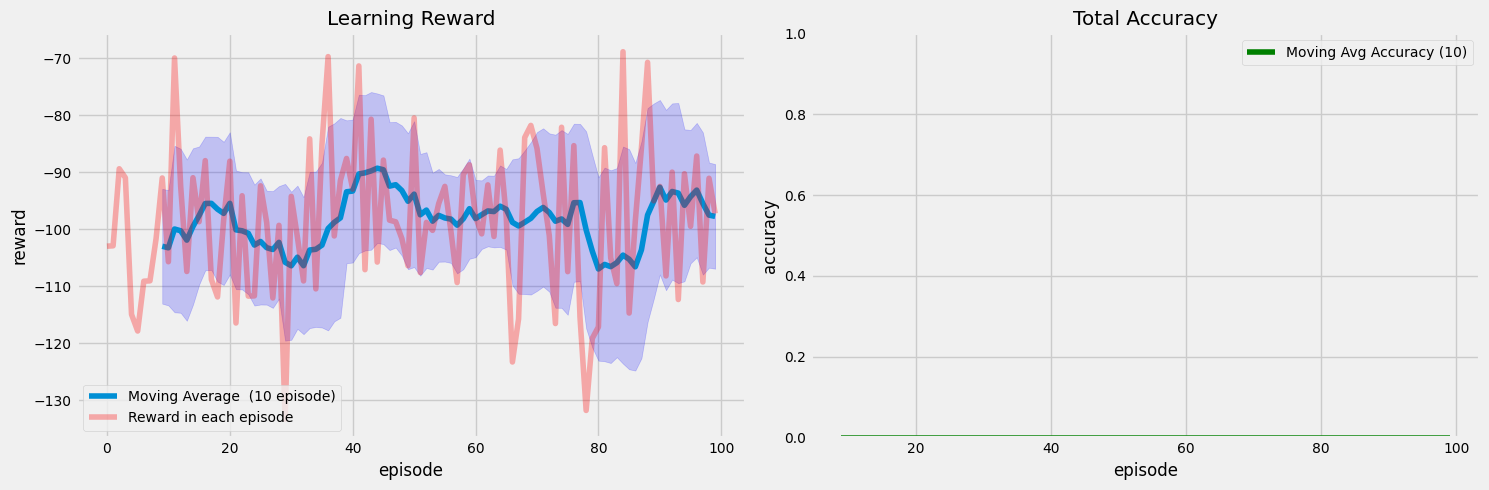

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 500      |
|    ep_rew_mean      | -98.6    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 100      |
|    fps              | 433      |
|    time_elapsed     | 115      |
|    total_timesteps  | 50000    |
| train/              |          |
|    learning_rate    | 1e-05    |
|    loss             | 0.262    |
|    n_updates        | 24948    |
----------------------------------


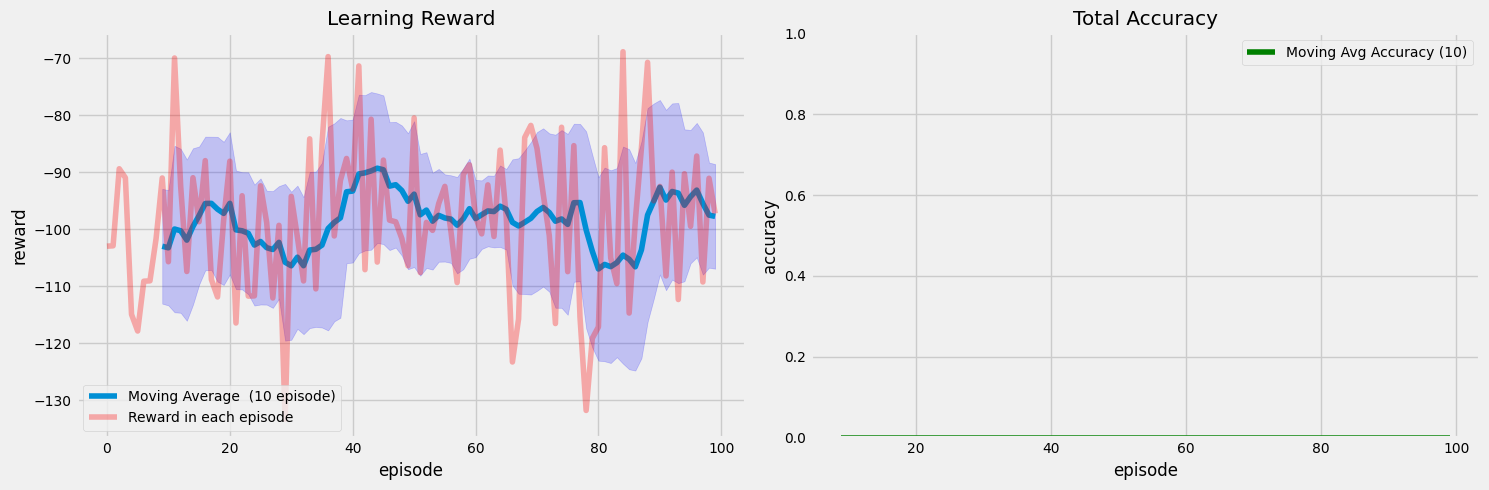

In [38]:
env = env1
obs_space = env.observation_space

# Policy settings using the new ResNet feature extractor
policy_kwargs = dict(
    features_extractor_class=AUVCNNExtractor,  # Use the new feature extractor
    features_extractor_kwargs=dict(features_dim=17),  # Extracted feature dimensions
    net_arch=[128, 64]  # Additional neural network architecture layers
)

callback = MyCallback(plot_every=50000, verbose=1)

# Create the DQN model with the custom policy
model = DQN(
    policy=AUV_DQNPolicy,  # Use the new AUV policy
    env=env,
    policy_kwargs=policy_kwargs,
    verbose=1,  # Enable training information output
    buffer_size=100000,  # Increase experience replay buffer size
    learning_rate=0.00001,  # Optimized learning rate
    batch_size=128,  # Larger batch size for more stable training
    gamma=0.99,
    train_freq=4,  # Increase training frequency
    gradient_steps=2,
    target_update_interval=500,  # Frequent target network updates
    exploration_fraction=0.6,  # Reduce exploration duration
    exploration_initial_eps=1.0,
    exploration_final_eps=0.01,
    tensorboard_log="./auv_resnet_tensorboard/"  # Save logs for TensorBoard
)

# Train the model
model.learn(
    total_timesteps=50000,
    callback=callback,
    log_interval=10,  # Log every 10 training iterations
    tb_log_name="auv_resnet"  # TensorBoard log name
)

callback.plot_progress()

# Save the trained model
model.save("auv_fault_diagnosis_resnet")

# Close the environment
env.close()


In [ ]:
# import torch
# import torch.nn as nn
# from torch.distributions import Categorical

# class MLPActorCritic(nn.Module):
#     def __init__(self, input_dim, num_actions):
#         super(MLPActorCritic, self).__init__()

#         self.shared = nn.Sequential(
#             nn.Linear(input_dim, 128),
#             nn.ReLU(),
#             nn.Linear(128, 128),
#             nn.ReLU()
#         )

#         self.actor = nn.Linear(128, num_actions)
#         self.critic = nn.Linear(128, 1)

#     def forward(self, x):
#         x = self.shared(x)
#         return self.actor(x), self.critic(x)


In [ ]:
# class PPOAgent:
#     def __init__(self, input_dim, num_actions, lr=3e-4, gamma=0.99, clip_eps=0.2):
#         self.model = MLPActorCritic(input_dim, num_actions)
#         self.optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
#         self.gamma = gamma
#         self.clip_eps = clip_eps

#     def get_action(self, state):
#         state = torch.FloatTensor(state).unsqueeze(0)  # shape: [1, 17]
#         logits, value = self.model(state)
#         dist = Categorical(logits=logits)
#         action = dist.sample()
#         return action.item(), dist.log_prob(action), value.squeeze(0), dist.entropy()


In [ ]:
# def update_policy(agent, memory, gamma=0.99, eps_clip=0.2, epochs=4):
#     rewards = []
#     discounted = 0
#     for reward, done in zip(reversed(memory["rewards"]), reversed(memory["dones"])):
#         if done:
#             discounted = 0
#         discounted = reward + gamma * discounted
#         rewards.insert(0, discounted)

#     rewards = torch.tensor(rewards, dtype=torch.float32)
#     states = torch.stack(memory["states"])
#     actions = torch.stack(memory["actions"])
#     old_log_probs = torch.stack(memory["log_probs"]).detach()
#     values = torch.stack(memory["values"]).squeeze()
#     advantages = rewards - values.detach()

#     optimizer = torch.optim.Adam(agent.model.parameters(), lr=1e-4)

#     for _ in range(epochs):
#         logits, values = agent.model(states)  # <---- اصلاح شده
#         dist = Categorical(logits=logits)    # استفاده از logits نه probs مستقیم
#         log_probs = dist.log_prob(actions)
#         entropy = dist.entropy()

#         ratios = torch.exp(log_probs - old_log_probs)
#         surr1 = ratios * advantages
#         surr2 = torch.clamp(ratios, 1 - eps_clip, 1 + eps_clip) * advantages

#         actor_loss = -torch.min(surr1, surr2).mean()
#         critic_loss = (rewards - values).pow(2).mean()
#         entropy_loss = -entropy.mean()

#         loss = actor_loss + 0.5 * critic_loss + 0.01 * entropy_loss

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()


In [ ]:
# import numpy as np
# import torch

# def train_ppo(agent, env, num_episodes=1000, update_interval=2000, gamma=0.99):
#     all_rewards = []
#     state, _ = env.reset()

#     memory = {
#         "states": [],
#         "actions": [],
#         "log_probs": [],
#         "rewards": [],
#         "values": [],
#         "dones": []
#     }

#     episode_reward = 0
#     total_steps = 0

#     for episode in range(num_episodes):
#         state, _ = env.reset()
#         done = False

#         while not done:
#             action, log_prob, value, _ = agent.get_action(state)

#             next_state, reward, terminated, truncated, _ = env.step(action)
#             done = terminated or truncated

#             #  saving data
#             memory["states"].append(torch.FloatTensor(state))
#             memory["actions"].append(torch.tensor(action))
#             memory["log_probs"].append(log_prob)
#             memory["rewards"].append(torch.tensor(reward))
#             memory["values"].append(value)
#             memory["dones"].append(torch.tensor(done, dtype=torch.float32))

#             state = next_state
#             episode_reward += reward
#             total_steps += 1

#             # updating network 
#             if total_steps % update_interval == 0:
#                 update_policy(agent, memory, gamma)
#                 memory = {k: [] for k in memory}  # خالی کردن حافظه

#         all_rewards.append(episode_reward)
#         print(f"Episode {episode+1}, reward = {episode_reward:.2f}")
#         episode_reward = 0

#     return all_rewards


In [20]:
# agent = PPOAgent(input_dim=17, num_actions=5)  
# rewards = train_ppo(agent, env1, num_episodes=500)


Streaming output truncated to the last 5000 lines.
action:4, y_true:3, num_run:2628351
rewards: [1.00016762 1.00720135 0.98860239 0.99558019 1.00844845]
accuracy: [0.19997652 0.19857992 0.20231607 0.20089801 0.19833434]
action:0, y_true:0, num_run:2628352
rewards: [1.00016917 1.00719516 0.98860392 0.99558173 1.00845001]
accuracy: [0.19997652 0.19858145 0.20231607 0.20089801 0.19833434]
action:1, y_true:1, num_run:2628353
rewards: [1.00016879 1.0071967  0.98860354 0.99558135 1.00844963]
accuracy: [0.19997652 0.19858107 0.20231607 0.20089801 0.19833434]
action:2, y_true:1, num_run:2628354
rewards: [1.00017029 1.00719821 0.98860503 0.99557533 1.00845114]
accuracy: [0.19997652 0.19858107 0.20231607 0.20089953 0.19833434]
action:3, y_true:3, num_run:2628355
rewards: [1.00017179 1.00719972 0.98859903 0.99557681 1.00845265]
accuracy: [0.19997652 0.19858107 0.2023176  0.20089953 0.19833434]
action:2, y_true:2, num_run:2628356
rewards: [1.0001714  1.00720125 0.98859865 0.99557643 1.00845226]
ac

In [21]:
# torch.save(agent.model.state_dict(), "ppo_auv_model.pth")
# print("model saved")


model saved


In [29]:
# agent.model.load_state_dict(torch.load("ppo_auv_model.pth"))
# agent.model.eval()
# print("model loaded")


model loaded


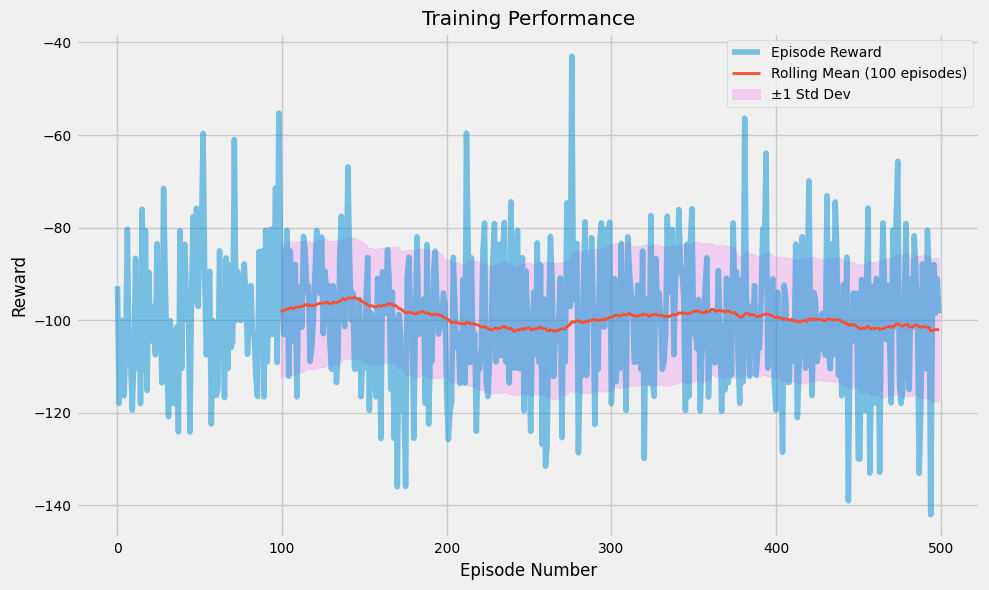

In [39]:
import numpy as np
import matplotlib.pyplot as plt

episode_rewards = rewards

window = 100
episode_rewards_np = np.array(episode_rewards)

# Calculate moving average using numpy convolution
rolling_mean = np.convolve(episode_rewards_np, np.ones(window)/window, mode='valid')

# Function to calculate moving standard deviation
def moving_std(data, window):
    stds = []
    for i in range(len(data) - window + 1):
        stds.append(np.std(data[i:i+window]))
    return np.array(stds)

std_dev = moving_std(episode_rewards_np, window)

episodes = np.arange(len(episode_rewards))
valid_episodes = episodes[window-1:]

plt.figure(figsize=(10,6))
plt.plot(episodes, episode_rewards, label='Episode Reward', alpha=0.5)
plt.plot(valid_episodes, rolling_mean, label=f'Rolling Mean ({window} episodes)', linewidth=2)
plt.fill_between(valid_episodes, rolling_mean - std_dev, rolling_mean + std_dev,
                 color='violet', alpha=0.3, label='±1 Std Dev')

plt.grid(True)
plt.xlabel('Episode Number')
plt.ylabel('Reward')
plt.title('Training Performance')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-7-3559303259>:140: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.pause(0.001)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


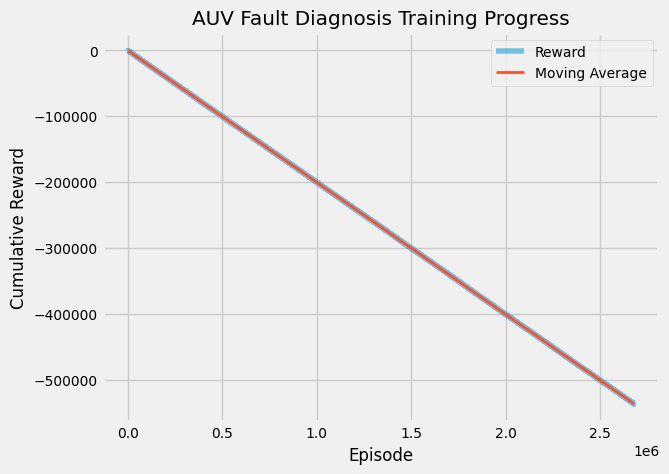

In [40]:
env1.render()

In [32]:
# import torch

# def predict_classes(model, X):
#     model.eval()
#     with torch.no_grad():
#         X_tensor = torch.FloatTensor(X)
#         logits, _ = model(X_tensor)
#         predictions = torch.argmax(logits, dim=1)
#     return predictions.numpy()

# Y_hat_train = predict_classes(agent.model, X_train)
# Y_hat_test = predict_classes(agent.model, X_test)

# train_accuracy = np.mean(Y_hat_train == y_train)
# test_accuracy = np.mean(Y_hat_test == y_test)

# print(f"Learning Accuracy: {train_accuracy:.2%}")
# print(f"Test Accuracy: {test_accuracy:.2%}")


Learning Accuracy: 22.35%
Test Accuracy: 22.37%


In [41]:
import numpy as np
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

# Load the trained model
model = DQN.load("auv_fault_diagnosis_resnet")

# Perform batch prediction (deterministic)
Y_hat_test = model.predict(X_test, deterministic=True)[0]
Y_hat_train = model.predict(X_train, deterministic=True)[0]

# Calculate accuracy
train_accuracy = np.mean(Y_hat_train == y_train)
test_accuracy = np.mean(Y_hat_test == y_test)

print(f"Learning accuracy: {train_accuracy:.2%}")
print(f"Test accuracy: {test_accuracy:.2%}")


learning accuracy : 25.14%
test accuracy : 25.28%


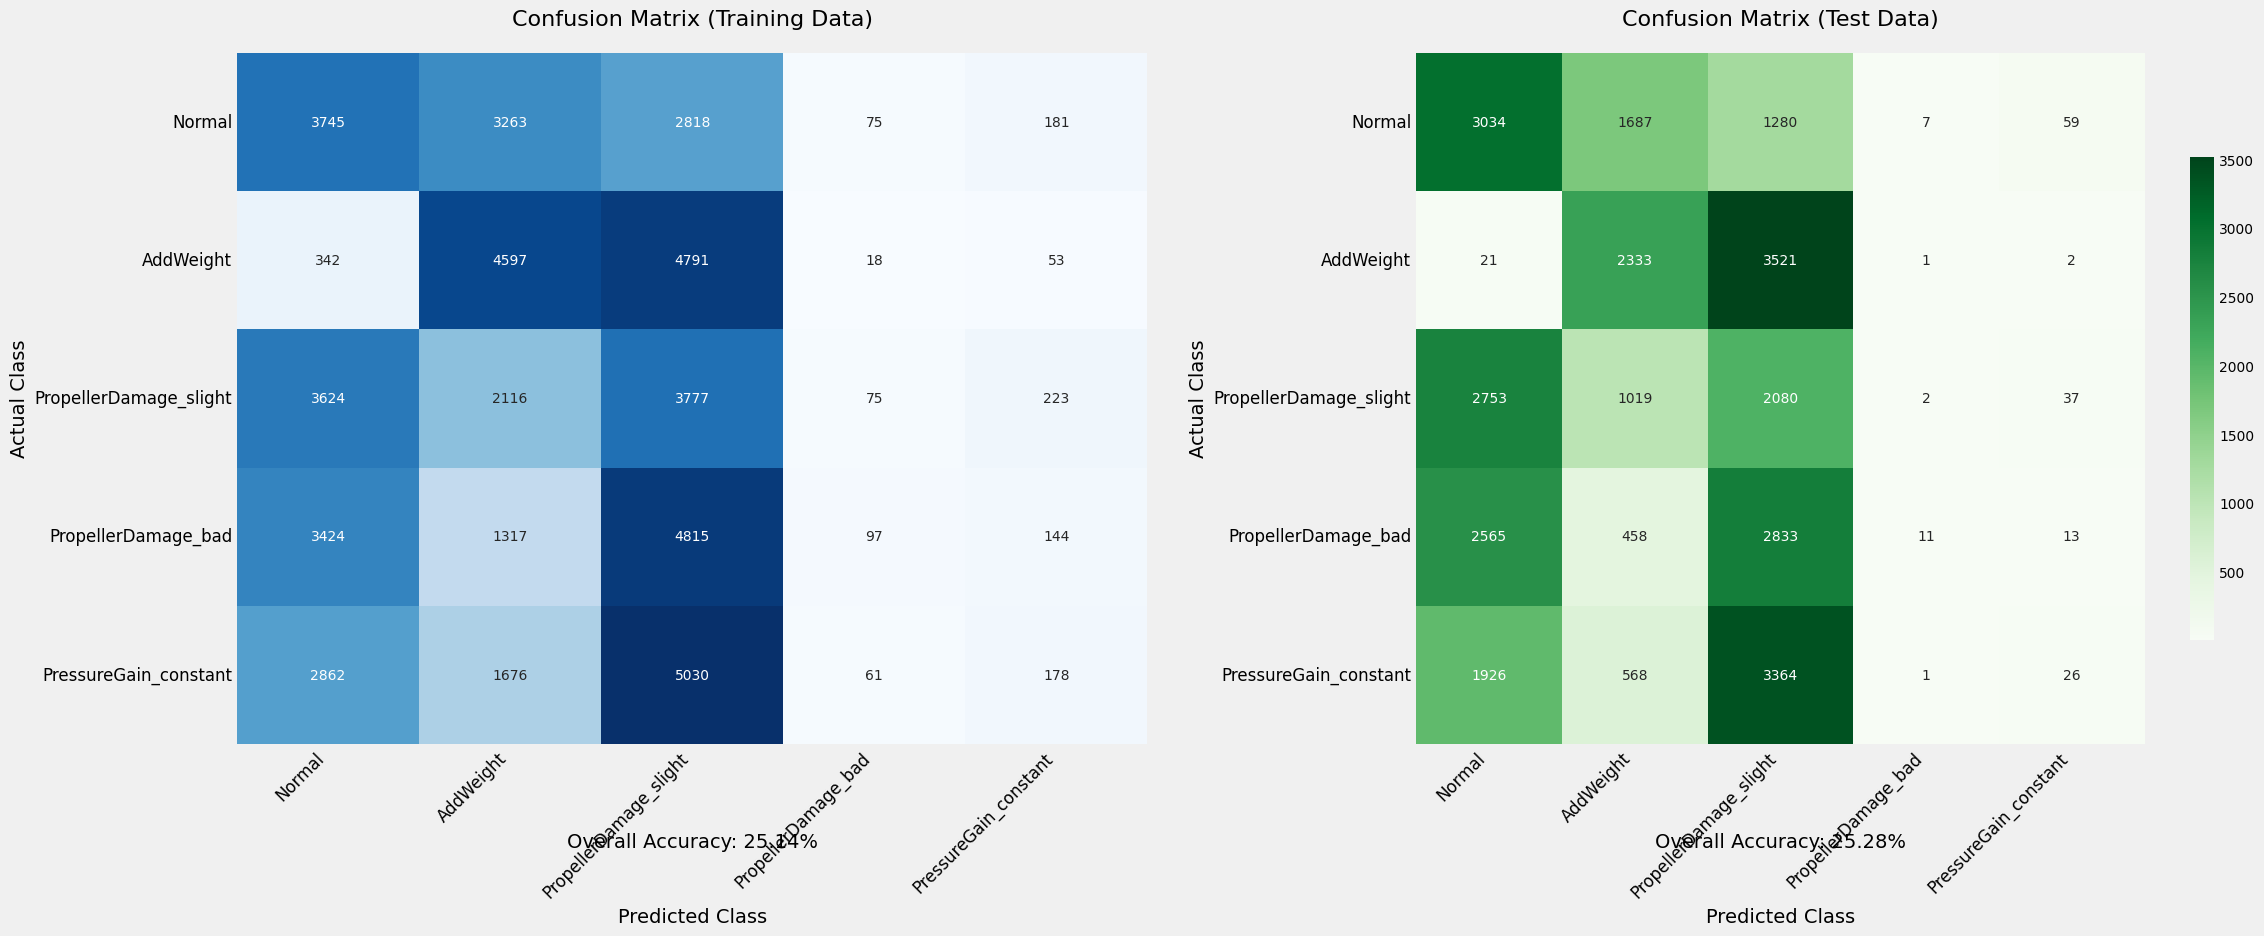

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define class names
class_names = ['Normal', 'AddWeight', 'PropellerDamage_slight', 'PropellerDamage_bad', 'PressureGain_constant']

# Calculate confusion matrices for train and test sets
cm_train = confusion_matrix(y_train, Y_hat_train)
cm_test = confusion_matrix(y_test, Y_hat_test)

# Create the figure
plt.figure(figsize=(24, 10))

# Plot training confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(
    cm_train,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title('Confusion Matrix (Training Data)', fontsize=16, pad=20)
plt.ylabel('Actual Class', fontsize=14)
plt.xlabel('Predicted Class', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Add overall accuracy text below the plot
train_accuracy = np.trace(cm_train) / np.sum(cm_train)
plt.text(0.5, -0.15, f'Overall Accuracy: {train_accuracy:.2%}',
         fontsize=14, ha='center', transform=plt.gca().transAxes)

# Plot test confusion matrix
plt.subplot(1, 2, 2)
heatmap = sns.heatmap(
    cm_test,
    annot=True,
    fmt='d',
    cmap='Greens',
    cbar=True,
    cbar_kws={'shrink': 0.7},
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title('Confusion Matrix (Test Data)', fontsize=16, pad=20)
plt.ylabel('Actual Class', fontsize=14)
plt.xlabel('Predicted Class', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Add overall accuracy text below the plot
test_accuracy = np.trace(cm_test) / np.sum(cm_test)
plt.text(0.5, -0.15, f'Overall Accuracy: {test_accuracy:.2%}',
         fontsize=14, ha='center', transform=plt.gca().transAxes)

# Adjust layout to prevent overlap
plt.tight_layout(pad=3.0)

# Save the figure and display it
plt.savefig('AUV_Fault_Diagnosis_Results.png', dpi=400, bbox_inches='tight')
plt.show()
